# Goal
* develop tests

In [6]:
import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt

In [19]:
from importlib import reload
from simSPI import geometric_micelle
reload(geometric_micelle)

<module 'simSPI.geometric_micelle' from '/Users/gw/repos/helena-fork/simSPI/simSPI/geometric_micelle.py'>

In [20]:
scale=5
a=3*scale
b=2*scale
c=1*scale
step_x = step_y = 1
max_axis = np.max([a,b])
x_mesh, y_mesh = np.meshgrid(np.arange(-max_axis,max_axis,step=step_x),np.arange(-max_axis,max_axis,step=step_y))
axis = np.array([0,0,1])
deg=45
angle = np.deg2rad(deg)
r = Rotation.from_rotvec(angle*axis).as_matrix()


Text(0.5, 1.0, 'Rotated about [0 0 1] by 45 deg\n a=15,b=10,c=5')

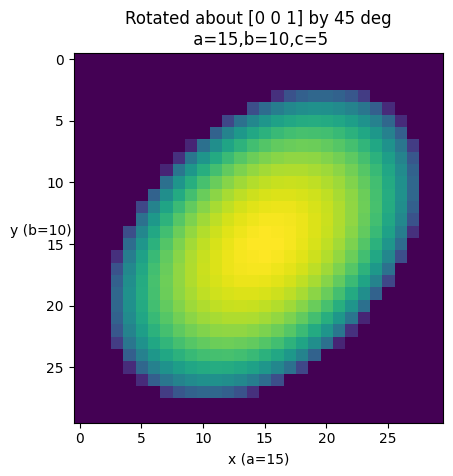

In [21]:
proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh,y_mesh,a,b,c,r)

plt.imshow(proj_ellipsoid)
plt.xlabel(f'x (a={a})')
plt.ylabel(f'y (b={b})',rotation=0)
plt.title(f'Rotated about {axis} by {deg} deg\n a={a},b={b},c={c}')

In [25]:
def test_project_rotated_ellipsoid():
    '''
    test that projecting then summing is the same as the analytical formula.
    errors arise from discretiziation on 2D array mesh, so set atol to test close enough
    '''
    analytic_vol_ellipsoid = 4/3*np.pi*a*b*c

    scale=5
    a=3*scale
    b=2*scale
    c=1*scale
    step_x = step_y = 1
    max_axis = np.max([a,b])
    x_mesh, y_mesh = np.meshgrid(np.arange(-max_axis,max_axis,step=step_x),np.arange(-max_axis,max_axis,step=step_y))
    axis = np.array([0,0,1])
    deg=45
    angle = np.deg2rad(deg)
    r = Rotation.from_rotvec(angle*axis).as_matrix()
    
    proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh,y_mesh,a,b,c,r)
    volume = proj_ellipsoid.sum()

    rel_error = np.abs(analytic_vol_ellipsoid - arr_2d.sum()) / analytic_vol_ellipsoid
    assert np.isclose(rel_error,0, atol=1e-3)
